# **A Machine Learning Project** -   *ARIMA, Gradient Boosting and Recurrent  Neural Networks Models*

 # *04/06/2024*

## *DataScience #OnlineSalesAnalysis #Forecasting #Python #Pandas #skforecast #Machinelearning #Pytorch*

Pandas: https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.agg.html

Seaborn: https://seaborn.pydata.org/generated/seaborn.rugplot.html



------------------------------------------------------------------------

## **E-Commerce, Data Analysis of Online Sales using ARIMA**  **and Gradient Boosting Models**

# *by Floyd L. MABIALA*

# **Summary of the project**

- I have managed to implement the ARIMA and Gradient Boosting modelS and compare them to RNN-LSTM model.
- I first started by Data Cleaning, to ensure consistency and accuracy, and checking the Missing Data, to Identify and address missing values in your dataset.
- Then the Data Exploration, to get a basic understanding of the data by looking at descriptive statistics and data visualizations. Identify potential relationships and areas for further.
- Furthermore, I then conducted a thorough analysis of Overall Sales Trends to Identify trends in sales over time. Then the Product Performance to Analyse which products are selling the most and the least.
- Finally, the Prediction/ Forecasting is reserved for `Part 2.`

# 1. Methods, Experimentation designs and Performance
# 1.1. Methods:

Here, we proposed a ARIMA and Gradient Boosting Models for accurate Sales Revenue Prejection. The input features used in our modelling are Total Sales Revenue over time.
DataSet is a popular Online Sales Dataset that collects data mainly in three Regions of the World mainly North America, Europe and Asia.

# 1.2 Experimentation designs

In the first step of the project, we Conducted a Data Exploration

and a thorough analysis of Overall Sales Trends to Identify trends in sales over time as well as the Product Performance.

In the second part, we proposed ARIMA and Gradient Boosting Models for Sales Revenue projection.
The main aim of this project is to compare forecasting models, check the predicting accuracy of the Sales Revenue days ahead or sequence length.

# 1.3. Performance comparison of the proposed methods

To evaluate the performance of the models, data is randomly categorised into three training (80%), testing (20%) sets, the ARIMA, Gradient Boosting and LSTM deep network is used.

To compare the performance of the applied forecasting models, four broad performance indices are used: the mean square error (MSE), the root mean square error (RMSE), Mean Absolute Percentage Error (MAPE) and the Pearson correlation coefficient (R).

# 1. 4. Import all the libraries

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

from statsmodels.tsa.seasonal import seasonal_decompose

# 2. Load the DataSet, Visualize and Clean the Data

In [ ]:
# Define and Print out the dataset Online Sales Data
#=========================================================================================================

data_frame = pd.read_csv('/kaggle/input/online-sales-dataset-popular-marketplace-data/Online Sales Data.csv')
data_frame.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


# *Observation 1*
We have 240 rows and 9 categories or columns. What is observed here is that the data goes up to August 2024 (2024-08-27). Eighth month 2024, which a bit strange because we are still in June (sixth month). This tells us that it could a synthetic data.

# 2.1. Exploratory Data Analysis (EDA)

## 2. 2. Data info

In [ ]:
# Get the data info
#===========================================================================================

data_frame.info()
print('=============================================')
print('-----Missing values in the dataset ------')
data_frame.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB
-----Missing values in the dataset ------


Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

# *Observation 2*
As I said the data might synthetic, because the information about the data looks so clean and there are no missing values, which again, is a bit strange, or it is just cleaned.

In [ ]:
data_frame.nunique()

Transaction ID      240
Date                240
Product Category      6
Product Name        232
Units Sold            7
Unit Price          117
Total Revenue       173
Region                3
Payment Method        3
dtype: int64

# *Observation 3*

1. We can see the dataset has 240 entries of Transaction ID and Date
2. The product categories are 6 with 232 Product Names.
3. There are 3 regions and 3payment methods.


In [ ]:
# Profucts category
#=====================================================================================

p_category = data_frame['Product Category'].value_counts().index
print('Category Names:', p_category)
# Total counts
print('==================================================================')
# Products total counts
t_category = data_frame['Product Category'].value_counts()
print(t_category)

Category Names: Index(['Electronics', 'Home Appliances', 'Clothing', 'Books',
       'Beauty Products', 'Sports'],
      dtype='object', name='Product Category')
Product Category
Electronics        40
Home Appliances    40
Clothing           40
Books              40
Beauty Products    40
Sports             40
Name: count, dtype: int64


# *Observation 4*
All the product categories are listed above and have got the same number of unit product = 40.

In [ ]:
# Describe the dataframe stats
#===========================================================================================
print('Duplicated Data:', data_frame.duplicated().sum())
print('================================================================================')

print('Stats description:\n', data_frame.describe().T)

Duplicated Data: 0
Stats description:
                 count          mean         std      min        25%       50%  \
Transaction ID  240.0  10120.500000   69.426220  10001.0  10060.750  10120.50   
Units Sold      240.0      2.158333    1.322454      1.0      1.000      2.00   
Unit Price      240.0    236.395583  429.446695      6.5     29.500     89.99   
Total Revenue   240.0    335.699375  485.804469      6.5     62.965    179.97   

                      75%       max  
Transaction ID  10180.250  10240.00  
Units Sold          3.000     10.00  
Unit Price        249.990   3899.99  
Total Revenue     399.225   3899.99  


# 2.3. Convert the DataSet to Datetime Index

In [ ]:
# It is preferable to have the Datetime as an Index rather than number
# So we can change the dataset index
# Define and Print out the dataset Online Sales Data
#========================================================================================

df = pd.read_csv('/kaggle/input/online-sales-dataset-popular-marketplace-data/Online Sales Data.csv',
                 parse_dates = ['Date'], index_col = ['Date'])

# Change data type to datatime
df.index = pd.to_datetime(df.index)
df.head()

,Transaction ID,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
Date,,,,,,,,
2024-01-01,10001,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
2024-01-02,10002,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2024-01-03,10003,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
2024-01-04,10004,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
2024-01-05,10005,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


# *Observation 5*
The Dataset has changed the index of the first column to Date. Everything else remains the same and only that we now have 8 columns or features.
This makes easier when plotting as a time series problem.


# 2.4. Total Revenue by Day, Weekly and Month over time======

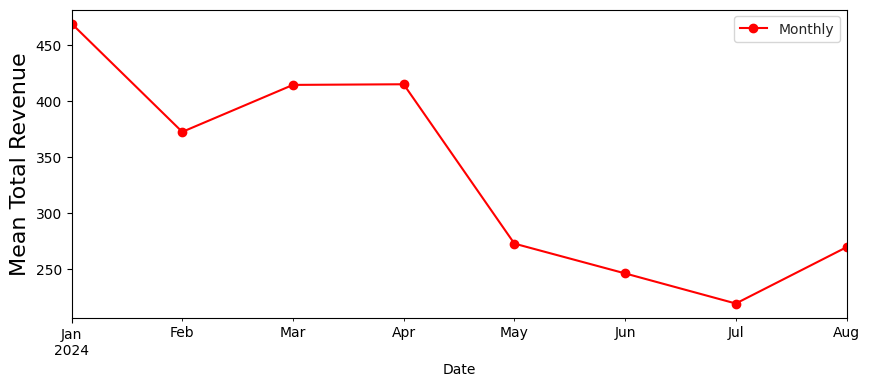

In [ ]:
# Total Revenue in Monthly time Steps
# Plot the Total Revenue
#======================================================================================

plt.figure(figsize =(10, 4))
df['Total Revenue'].resample('ME').mean().plot(color = 'red',
                                               label = 'Monthly', marker = 'o')
sns.set_style('whitegrid')
plt.legend()
plt.ylabel('Mean Total Revenue', fontsize = 16)
plt.show()

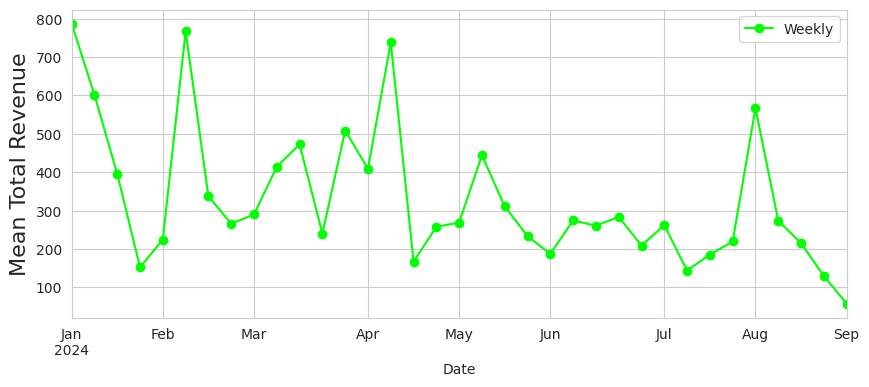

In [ ]:
# Resample the the Total Revenue in Weekly time Steps
#=====================================================================================

plt.figure(figsize =(10, 4))
df['Total Revenue'].resample('W').mean().plot(color=['lime', 'lightcoral'],
                                              label = 'Weekly', marker = 'o')
plt.legend()
plt.ylabel('Mean Total Revenue', fontsize = 16)
plt.show()

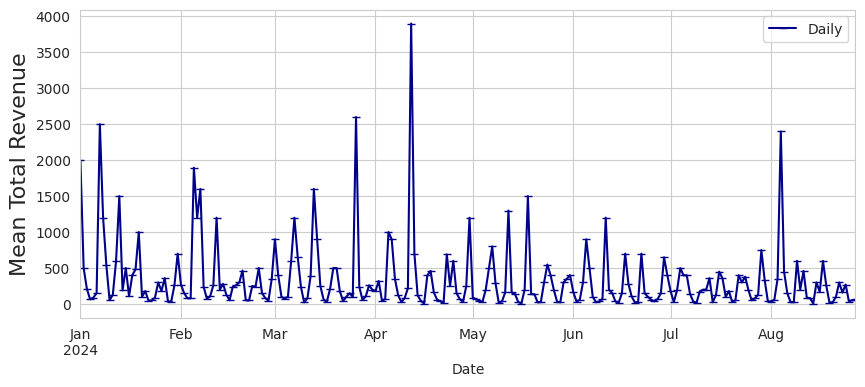

In [ ]:
# Plot the Total Revenue
# Total Revenue in daily time Steps
#=========================================================================================

sns.set_style('whitegrid')
plt.figure(figsize =(10, 4))
df['Total Revenue'].resample('D').mean().plot(color = 'darkblue',
                                              label = 'Daily', marker = '_')
plt.legend()
plt.ylabel('Mean Total Revenue', fontsize = 16)
plt.show()

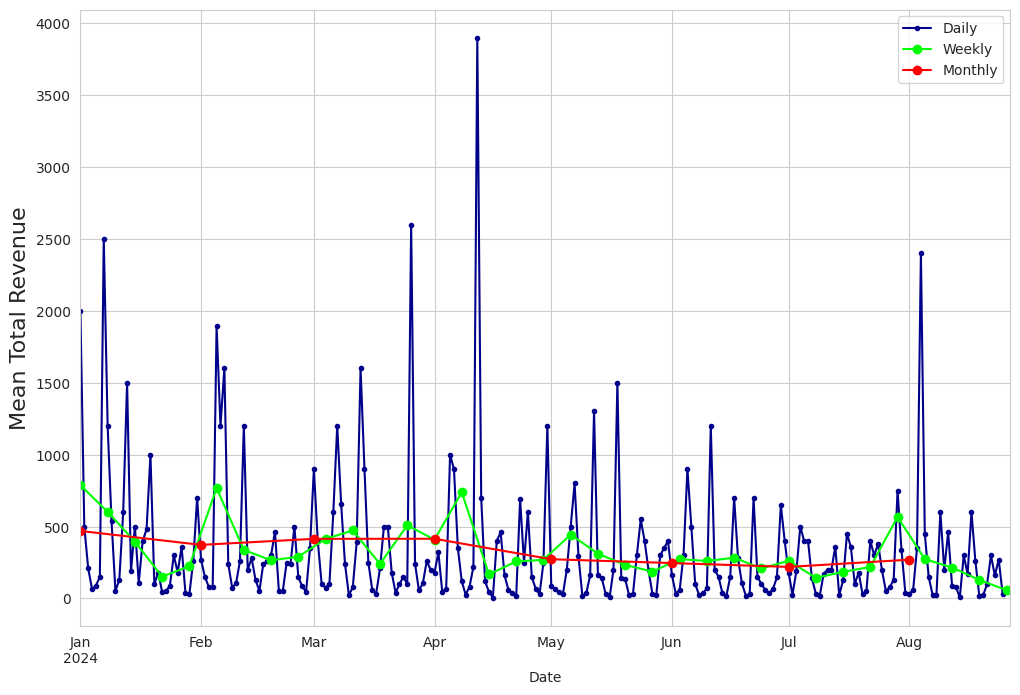

In [ ]:
# Resample the the Total Revenue in daily and Weekly time Steps
#=========================================================================================

sns.set_style('whitegrid')
plt.figure(figsize =(12, 8))
df['Total Revenue'].resample('D').mean().plot(color ='darkblue',label ='Daily', marker='.')
df['Total Revenue'].resample('W').mean().plot(color ='lime',label ='Weekly', marker='o')
df['Total Revenue'].resample('ME').mean().plot(color = 'red',label ='Monthly', marker ='o')
sns.set_style('whitegrid')

plt.legend()
plt.ylabel('Mean Total Revenue', fontsize = 16)
plt.show()

# *Observation 6*
The sale goes between Jan and August, and no data between Sept and Dec.
There are 4 high peaks in the Weekly graph: between Dec and Jan, in Feb, Apr and Aug. A small one in May. Showing less demand between May and July.
In the daily graph, we can see April has the highest sales, followed by the 3 Jan-March-Aug with rough the same amount of revenue.
We will have to analyse the data within the 3 regions to see what the major events in these periods trigger the high revenue sales.  


# 2.5. Product Categories and Product Names

In [ ]:
# Product Category
#==========================================================================================

product_cat_name = df['Product Category'].unique()
print('Different categories 6:', product_cat_name)
print('===================================================================================')
# Product Name
tot_product_name = df['Product Name'].nunique()
print('Number of produtcs:',tot_product_name)
print('===================================================================================')

# Total Number of Units Sold
#===========================================================================================
print('Total Number of Units Sold:', df['Units Sold'].value_counts().sum(), 'Items')

# Product Name
product_name = df['Product Name'][:10]
print('===================================================================================')
print('First 10 produtc Names:\n', product_name.value_counts().index)
print('-----------------------------------------------------------------------------------')

Different categories 6: ['Electronics' 'Home Appliances' 'Clothing' 'Books' 'Beauty Products'
 'Sports']
Number of produtcs: 232
Total Number of Units Sold: 240 Items
First 10 produtc Names:
 Index(['iPhone 14 Pro', 'Dyson V11 Vacuum', 'Levi's 501 Jeans',
       'The Da Vinci Code', 'Neutrogena Skincare Set',
       'Wilson Evolution Basketball', 'MacBook Pro 16-inch',
       'Blueair Classic 480i', 'Nike Air Force 1', 'Dune by Frank Herbert'],
      dtype='object', name='Product Name')
-----------------------------------------------------------------------------------


# *Observation 7*
There are 6 different categories and a total Number of 232 products. We can see that in this period a Total Number of Units Sold was 240.



# 2.6.  Sales Revenue per Region

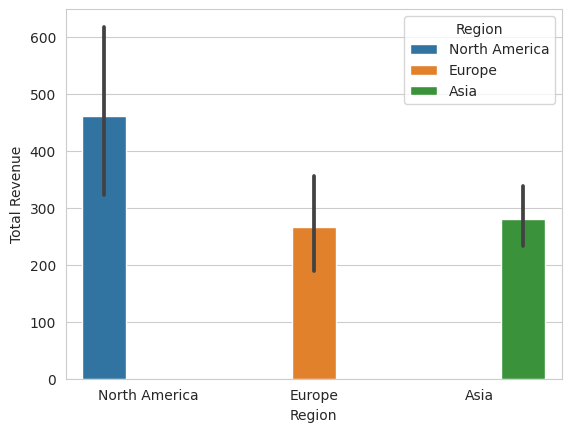

In [ ]:
# Total Revenue Sales per Rigion
#======================================================================================

sns.barplot(x= 'Region', y = 'Total Revenue', hue = 'Region', data= df)
plt.show()

# *Observation 8*
Sales revenue per region shows that North America has more sales, which indicates the most amount of revenue, followed by Europe and then Asia. It also indicates the buying power of the north American and Europe.




/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


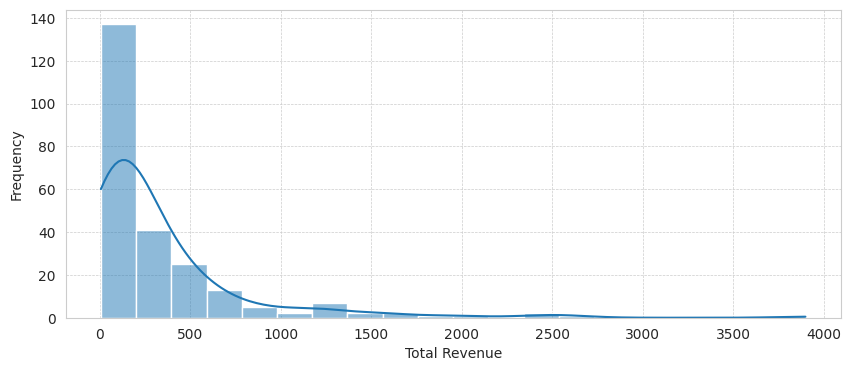

In [ ]:
# Revenue distribution
#===================================================================================

plt.figure(figsize =(10, 4))
sns.histplot(df['Total Revenue'], bins = 20, kde=True)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylabel('Frequency')
plt.show()

# 2. 7. ===Analyze Sales Trends over Time=====

In [ ]:
df2 = data_frame #.copy()

# Analyze Sales Trends over Time by Month
#========================================================================================= 2

df2["month_name"] = pd.DatetimeIndex(df2["Date"]).month_name()
df2["month_num"] = pd.DatetimeIndex(df2["Date"]).month
df2.head(2)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,month_name,month_num
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,January,1
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,January,1


In [ ]:
# Analyze Sales Trends over Time by Day
#==========================================================================================

df2["day_name"] = pd.DatetimeIndex(df2["Date"]).day_name()
df2["day_num"] = pd.DatetimeIndex(df2["Date"]).dayofweek + 1
df2.head(2)

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,month_name,month_num,day_name,day_num
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,January,1,Monday,1
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,January,1,Tuesday,2


In [ ]:
# Group by Month and Aggregate the Sum of units sold and Total revenue (All Regions)
#==========================================================================================

sales_by_month=(df2.groupby(["month_num",
                               "month_name"]
                           ).agg({"Units Sold": "sum",
                                  "Total Revenue": "sum"}
                                ).sort_values("month_num").reset_index())

print('========= Unit Sold and Total Revenue per Month============\n', sales_by_month.head())

========= Unit Sold and Total Revenue per Month============
    month_num month_name  Units Sold  Total Revenue
0          1    January          68       14548.32
1          2   February          77       10803.37
2          3      March          82       12849.24
3          4      April          65       12451.69
4          5        May          60        8455.49


In [ ]:
# Group by Month and Aggregate the Sum of units sold and Total revenue (All Regions)
#==========================================================================================

sales_by_region=(df2.groupby(["month_num",
                               "month_name", "Region"]
                            ).agg({"Units Sold": "sum", "Total Revenue": "sum"}
                                 ).sort_values("month_num").reset_index())

print('========= Unit Sold and Total Revenue per Month===========\n', sales_by_region.head())

========= Unit Sold and Total Revenue per Month===========
    month_num month_name         Region  Units Sold  Total Revenue
0          1    January           Asia          33        3369.67
1          1    January         Europe          11        2869.89
2          1    January  North America          24        8308.76
3          2   February           Asia          34        4278.68
4          2   February         Europe          15        3201.90


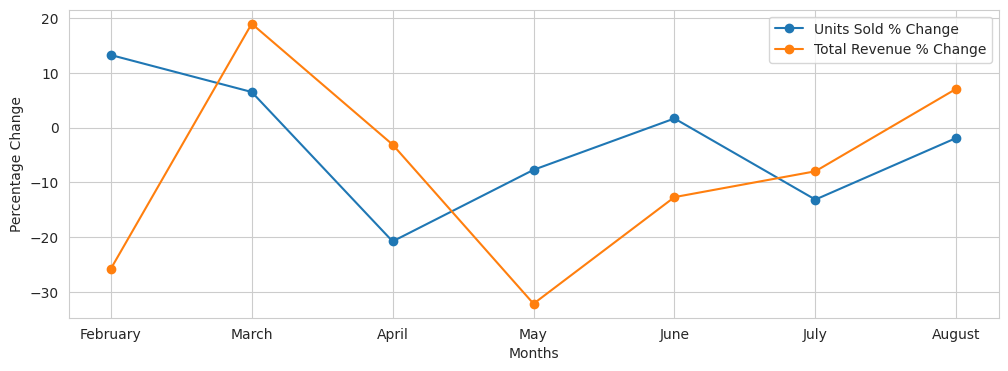

In [ ]:
# Calculate percentage change for 'Units Sold' and 'Total Revenue' by Month (All Regions)
# This helps to get percentage instead just number, it makes it easy to read and analyze
#=========================================================================================

sales_by_month['Units Sold % Change'] = sales_by_month['Units Sold'].pct_change() *100

sales_by_month['Total Revenue % Change'] = sales_by_month['Total Revenue'].pct_change() *100

plt.figure(figsize =(12, 4))
plt.plot(sales_by_month['month_name'],sales_by_month['Units Sold % Change'],
         marker='o', label='Units Sold % Change')

plt.plot(sales_by_month['month_name'],sales_by_month['Total Revenue % Change'],
         marker='o', label='Total Revenue % Change')

plt.xlabel('Months')
plt.ylabel('Percentage Change')
plt.legend()
plt.grid(True)
plt.show()

# *Observation 9*
Unit Sold and Total Revenue per Month amongst the Regions are highlighted above. In January for example:

**Asia** sold 33 different products with a total Revenue of $ 3369.67.

**Europe** 11 were different products with total Revenue of $ 2869.89

**North America** 24 different products with total Revenue of $ 8308.76

Therefore, we are able to get these details in each region and at a particular time period.



# 2.8.  Distribution of Item Sold=========

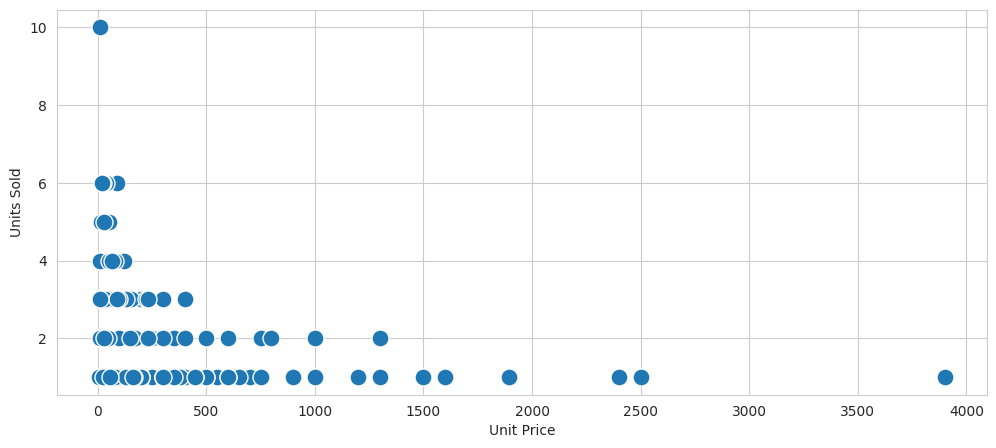

In [ ]:
# Single items are the most sold
# Items sold
#===========================================================================================
plt.figure(figsize =(12, 5))
sns.scatterplot(x = 'Unit Price', y= 'Units Sold', data=df, s=150)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


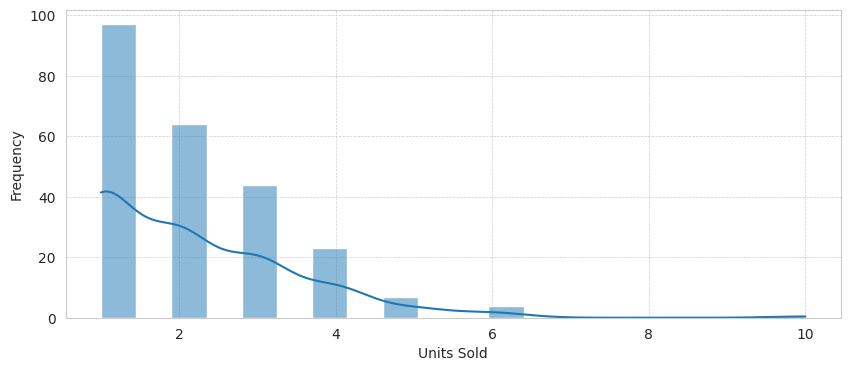

In [ ]:
# Single items are the most sold
# Items sold
#===========================================================================================
plt.figure(figsize =(10, 4))
sns.histplot(df['Units Sold'], bins = 20, kde=True)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.ylabel('Frequency')
plt.show()

# *Observation 10*

The Number of Items sold vs the price per unit and the frequence of number of items sold are displayed in these three graphs.
We can see the most items sold and also the unit price per item. The price of the unit varies between 0.1-4000
Cheaper units and Single items are sold the most. Very few units of 4000 are sold. Certainly, because the price is a bit high.



# 2.9.  Sales Revenue per Category

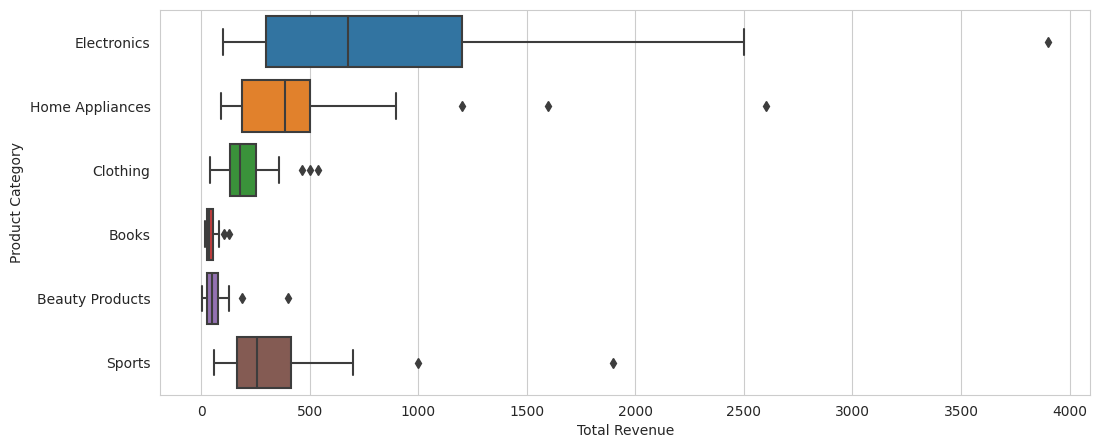

In [ ]:
# Total revenue per category [ x= category, y= total revenue]
#==========================================================================================

plt.figure(figsize =(12, 5))
sns.boxplot(x ='Total Revenue', y ='Product Category', data=df)
plt.show()

# *Observation 11*

It is important to note that, the category Electronics sell more than other products (about 4000 dollars). Then comes Home Appliances and Sports with about 2600 and $$1900 respectively.

Clothing and Beaty products come fourth and fifth position. Lastly, are books product with a total revenue of less than $$250.  



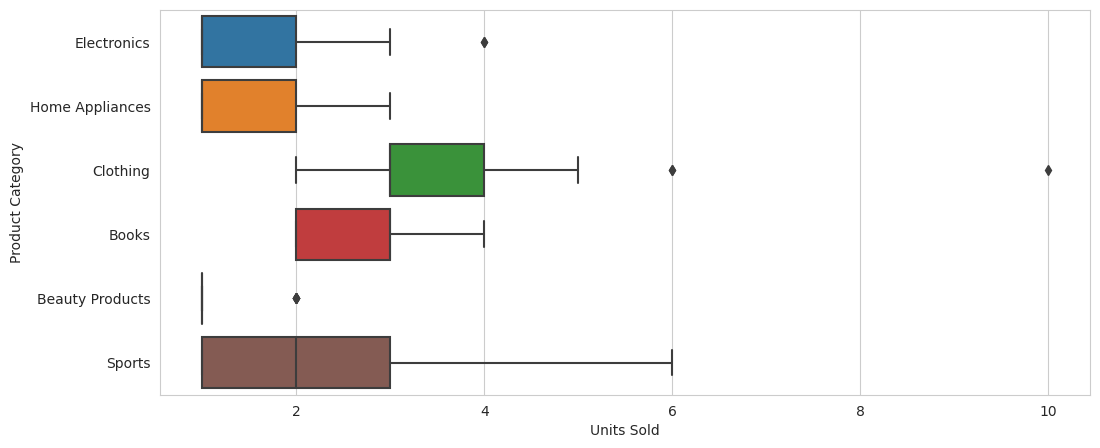

In [ ]:
# Total unit sold per Category
#=====================================================================================

plt.figure(figsize =(12, 5))
sns.boxplot(x ='Units Sold', y ='Product Category', data=df)
plt.show()

# *Observation 12*

As much as this might sound strange, the data shows that Clothing products are sold the most in terms of quantity, meaning cloths items are the most sold, but because of the unit price they have less amount of the total revenue as said above. And this makes sense when compared to Electronics because its unit price is higher than the unit price of cloths.



# 2. 10. Unite Price per Category and items

In [ ]:
print('=================================================================================')
print('Number of Categories: 6 such as:', df['Product Category'].unique())

Number of Categories: 6 such as: ['Electronics' 'Home Appliances' 'Clothing' 'Books' 'Beauty Products'
 'Sports']


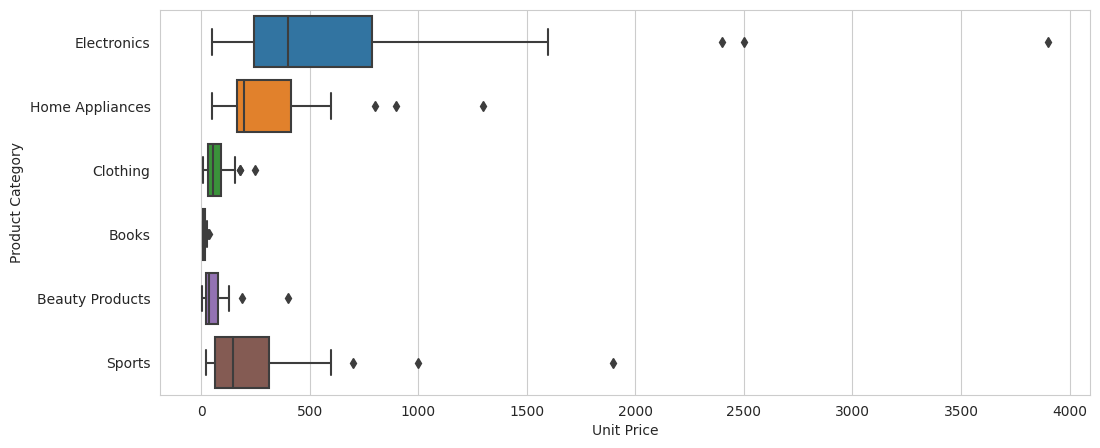

In [ ]:
# Unit Price per Category
#========================================================================================

plt.figure(figsize =(12, 5))
sns.boxplot(x ='Unit Price', y ='Product Category', data=df)
plt.show()

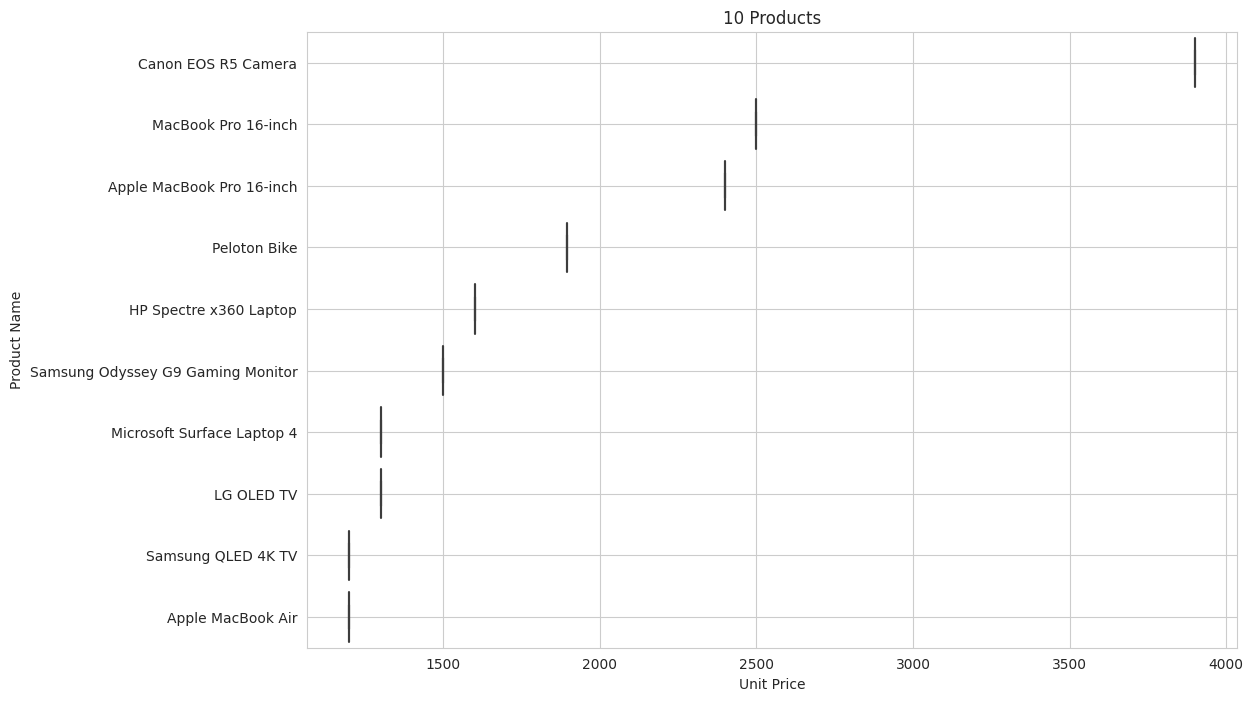

In [ ]:
# Unit price per item
#=======================================================================================
plt.figure(figsize =(12, 8))
sns.boxplot(df.groupby('Product Name')
            ['Unit Price'].sum().sort_values(ascending=False).head(10).reset_index(),
            y='Product Name',
            x='Unit Price'
           )
plt.title('10 Products')
plt.grid(True)
plt.show()

# *Observation 13*
The first graph shows Unit Price per Category and the second shows Unit Price per item. We observed that Electronics, home appliances and Sport have the most expensive items.
Therefore, even if the number of items sold is small but the total revenue can be different because the high price.
In the second graph where 10 products are listed, it can be seen the most expensive item is Canon EOS R5 Camera and the cheapest is Apple MacBook Air- this is just a sample.



# 2. 11. Sales Revenue per products

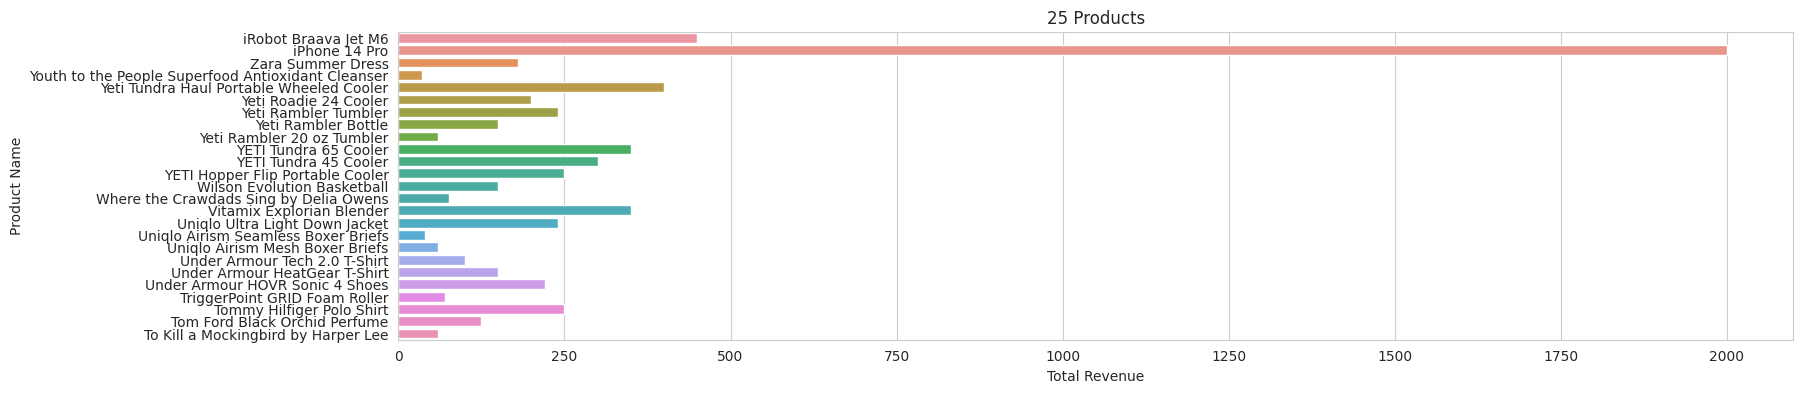

In [ ]:
# Sales per Product Name of Total Revenue less than $1900
#=======================================================================================

n_df = df[['Product Name', 'Total Revenue']]
fi = n_df.sort_values(by = 'Product Name', axis = 0, ascending = False)
fi2 = fi.head(25)
plt.figure(figsize=(18, 4))
sns.barplot(data= fi2, x='Total Revenue', y='Product Name')
plt.title('25 Products')
plt.show()

# *Observation 14*
There are about 232 different products / items. Above we only listed 25 items. And it shows that iPhone 14 Pro is the most sold products.



# 2. 12.  Sales Revenue of products *> $2000*

In [ ]:
# Total Revenue greater than $1900
#===========================================================================================

dff = df[n_df['Total Revenue']>=1900]
dff[:10]

,Transaction ID,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
Date,,,,,,,,
2024-01-01,10001,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
2024-01-07,10007,Electronics,MacBook Pro 16-inch,1,2499.99,2499.99,North America,Credit Card
2024-03-26,10086,Home Appliances,LG OLED TV,2,1299.99,2599.98,Europe,PayPal
2024-04-12,10103,Electronics,Canon EOS R5 Camera,1,3899.99,3899.99,North America,Credit Card
2024-08-04,10217,Electronics,Apple MacBook Pro 16-inch,1,2399.00,2399.00,North America,Credit Card


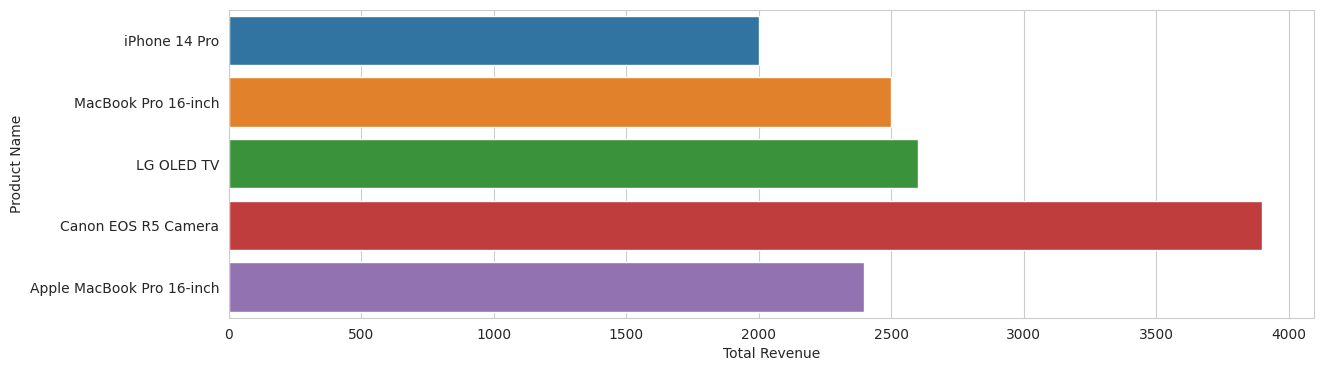

In [ ]:
# Total Revenue of Product of value greater than $1900
#===========================================================================================

new_df = dff[['Product Name', 'Total Revenue']]
fi = new_df.sort_values(by = 'Product Name', axis = 0, ascending = False)
fi2 = fi.head(30)
plt.figure(figsize=(14, 4))
sns.barplot(data= fi2, x='Total Revenue', y='Product Name')
plt.show()

# 2.13.  Payment Method used

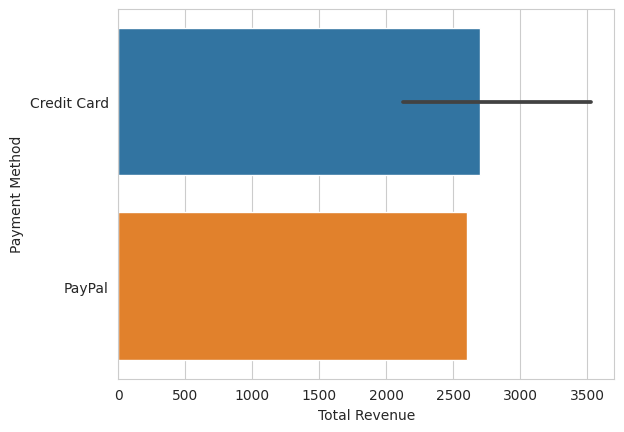

In [ ]:
sns.barplot(data= dff, x='Total Revenue', y='Payment Method')
plt.show()

# *Observation 15*
Apple MacBook pro-16, MacBook pro 16, LG Oled Tv, Canon EOS R5 Camera and iPhone 14 Pro are the most sold products. And they fall under the category of Electronics and Home appliances. These product categories are mostly sold in North America and Europe.
The payment method used these two regions is mostly credit card, following by PayPal - very interesting data.

However, the overall Payment Method used when looking at the graph below is Debit Card.



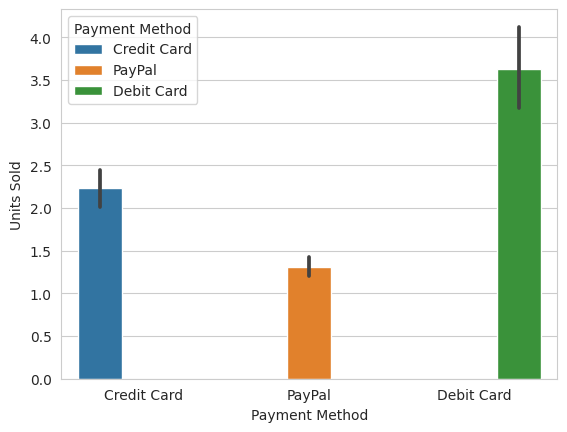

In [ ]:
# Payment Method used per Units Sold
#========================================================================================

sns.barplot(x= 'Payment Method', y = 'Units Sold', data=df, hue = 'Payment Method')
plt.show()

# 2. 14. Payment methods used to purchase used over time

Text(0.5, 0, 'Month')

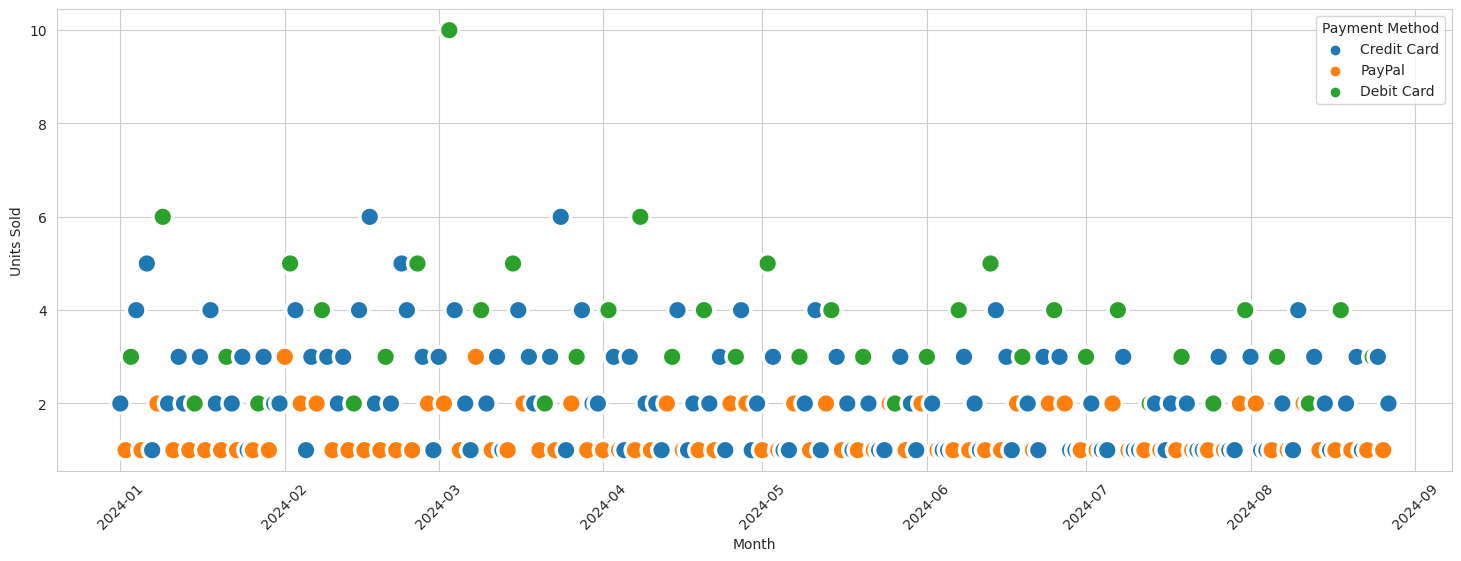

In [ ]:
# Payment methods used to purchase used over time

plt.figure(figsize=(18, 6))
sns.scatterplot(data=df, x='Date', y='Units Sold',
                linewidth=2.5, hue='Payment Method', s=200)
plt.xticks(rotation=45)
plt.xlabel('Month')

# *Obseravtion 16*
An evaluation of the Payment methods used to purchase products used over time.
Most payments are done using a Debit Card, and Credit Card- It shows that PayPal is the least payment method used.



# Conclusion

I managed to conducted

the Data Exploration, to get a basic understanding of the data by looking at descriptive statistics and data visualizations. Identify potential relationships and areas for further.
Furthermore, I then conducted a thorough analysis of Overall Sales Trends to Identify trends in sales over time. Then the Product Performance to Analyse which products are selling the most and the least.

In this First part the scope was limited on the Data Exploration and the Overall Sales Trends. and I am sure More could be done depending on the need.

---------------------------------------------------------------------------


Appreciate your time exploring my work. If you enjoyed it, kindly consider upvoting or feel free to drop comment / feedback to help enhance the notebook. Do check the Dataset as well and explore it in your own style! Happy Learning!

-----------------**********************************E...N...D**********************************----------------------BREAK